## Poszerzamy funkcjonalność naszej biblioteki przetwarzania obrazów cyfrowych

Przekształcenia obrazów mogą być przydatne do zwiększenia ich czytelności, korekcji geometrycznej, wydobycia pewnej informacji.

Przekształcenia geometryczne polegają na zmianie pozycji pikseli bez zmiany ich wartości (korekcja geometryczna). Narzędzia przekształceń geometrycznych już implementowaliśmy (obrót, odibicie, a nawet wycięcie fragmentu obrazu). 

Przekształcenia bezkontekstowe polegają na zmianie wartości piksela NIEZALEŻNIE od wartości pikseli sąsiadujących. Wyróżniamy podstawowe przekształcenia bezkontekstowe:

    Negacja
    Zmiana jasności
    Zmian kontrastu
    Wyrównanie histogramu
    Rozciągnięcie histogramu

In [24]:
#Importy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [56]:
#Kod biblioteki
def wczytaj_obraz(sciezka):
    return Image.open(sciezka)

def obraz_do_macierz(obraz):
    return np.array(obraz)

def macierz_do_obraz(macierz):
    return Image.fromarray(macierz.astype(np.uint8))

def rozbij_na_kanaly(obraz):
    macierz = obraz_do_macierz(obraz)
    k1 = macierz[:,:,0]
    k2 = macierz[:,:,1]
    k3 = macierz[:,:,2]
    return k1, k2, k3

def zloz(kanal1,kanal2,kanal3):
    macierz = np.stack((kanal1, kanal2, kanal3),axis=2)
    return macierz_do_obraz(macierz)

def obrot(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.rot90(macierz)
    return macierz_do_obraz(obrocona)

def odbicie(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.fliplr(macierz)
    return macierz_do_obraz(obrocona)

def zlicz(macierz):
    zliczenie = OrderedDict()
    for wiersz in macierz.tolist():
        for wartosc in wiersz:
            if wartosc in zliczenie.keys():
                zliczenie[wartosc] += 1
            else:
                zliczenie[wartosc] = 1
    return zliczenie

def histogram(obraz):
    k1, k2, k3 = rozbij_na_kanaly(obraz)
    histR = zlicz(k1)
    histG = zlicz(k2)
    histB = zlicz(k3)
    plt.figure(figsize=(15,4))
    plt.bar(histR.keys(), histR.values(), color = 'red', alpha = .8, width = 1)
    plt.bar(histG.keys(), histG.values(), color = 'green', alpha = .8, width = 1)
    plt.bar(histB.keys(), histB.values(), color = 'blue', alpha = .8, width = 1)


Negacja obrazu polega na "odwróceniu" histogramu. Każda wartość jest zastępywana swoją negacją w zakresie poziomów reprezentacji pikseli obrazu. Dla obrazu 8-bitowego: 

    g' = 255 - g, gdzie
    g -> wartość piksela przed
    g' -> wartość piksela po
    
Zatem piskel 8-bitowego obrazu o wartości 240, staje się g' = 255-240 = 15


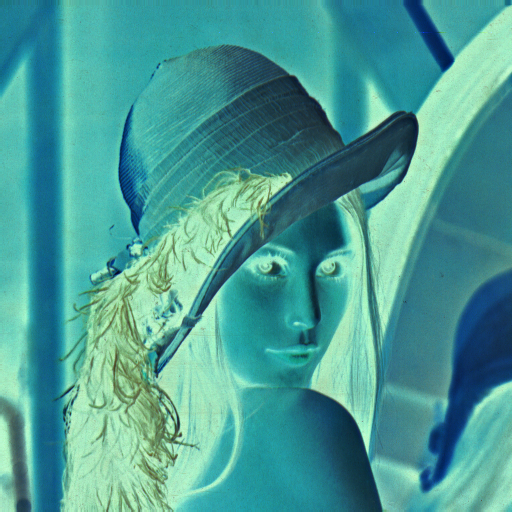

In [57]:
def negacja(obraz):
    #kod
    return nowy_obraz

obraz = wczytaj_obraz("Lena.png")
negacja(obraz)

Zmiana jasności polega na zmianie wartości <b> każdego piskela o tę samą wartość </b>. Można ją opisać wzorem:

    g' = g + a, gdzie:
    a -> wartość zmiany jasności
    
Zmiana może być dodatnia lub ujemna. Zmiana wartości o -5, zmieni wartość każdego piksela o -5, zatem 10 -> 5, 5 -> 0 itd.

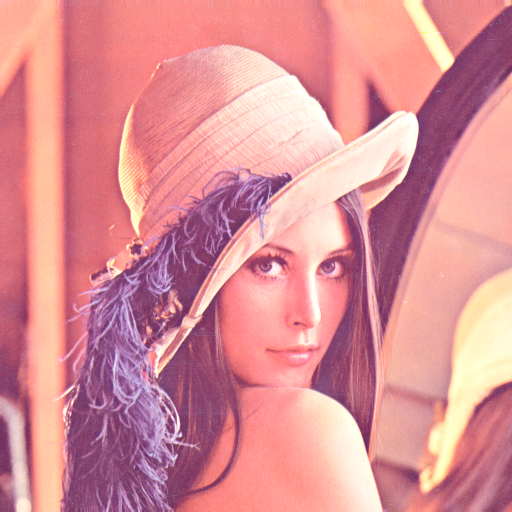

In [62]:
def jasnosc(obraz, wartosc):
    #kod
    return nowy_obraz

obraz = wczytaj_obraz("Lena.png")
jasnosc(obraz,44)

Zmiana kontrastu wizualnie zwiększa różnice pomiędzy najciemniejszymi i najjaśniejszymi punktami obrazu. Opisuje się ją wzorem:

    g' = (g - prg1)*255 / (255 - (prg1 - prg2), gdzie:
    
    prg1 -> próg dolny kontrastu
    prg2 -> próg górny kontrastru
    
    Dla symetrycznego progu:
    
    g' = (g-prg)*255 / (255-(2*prg))
   

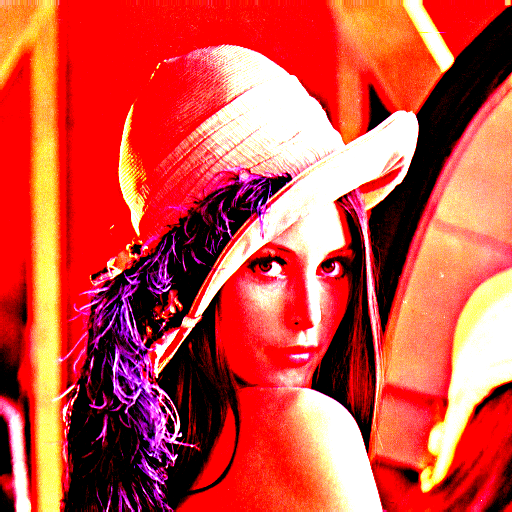

In [72]:
def kontrast(obraz, prog):
    #kod
    return nowy_obraz

obraz = wczytaj_obraz("Lena.png")
kontrast(obraz,100)

Tablica LUT przyspiesza oblicznia. Polega na stworzeniu tablicy zawierającej wszystkie wartości pikseli obrazu i wykonaniu ich przeliczenia. Pozwala to na uniknięcie wielokrotnego przeliczania tych samych wartości pikseli znajdujących się w obrazie.
Popraw powyższe funkcje, dodając tablicę LUT